In [ ]:
import pandas as pd
#import OLS module
from statsmodels.formula.api import ols

**We will first conduct a regression of stationarized (growth & detrended) data.**

In [ ]:
#analyze detrended edexp vs gdp avgage, urban, and differences in avgage, urban
data = pd.read_csv("tsdata.csv")
for column in data.columns:
  if column == "t":
    data[column] = data[column].astype(int)
  else:
    data[column] = data[column].astype(float)
print(data.head())

   t  edexp_gdp  dtr_g_edexp_cap  dtr_g_gdp_cap  medage  over_65  over_85  \
0  0   0.049118              NaN            NaN    27.2   0.0990   0.0070   
1  1   0.051003         0.114355       0.073335    27.3   0.1004   0.0073   
2  2   0.051453         0.098977       0.089595    27.4   0.1018   0.0076   
3  3   0.048908         0.053748       0.108671    27.5   0.1032   0.0079   
4  4   0.049076         0.083949       0.080693    27.6   0.1046   0.0082   

     urban  dmedage   durban       LFP  d_over_65  dtr_d_over_65  d_over_85  \
0  0.73602      NaN      NaN  0.603833        NaN            NaN        NaN   
1  0.73613      0.1  0.00011  0.601583     0.0014       0.001363     0.0003   
2  0.73623      0.1  0.00010  0.603833     0.0014       0.001326     0.0003   
3  0.73633      0.1  0.00010  0.607750     0.0014       0.001289     0.0003   
4  0.73643      0.1  0.00010  0.612750     0.0014       0.001252     0.0003   

   dtr_durban     d_LFP  
0         NaN       NaN  
1    0.000

**Regression of detrended growth of edexp_cap on detrended growth of gdp_cap, difference in urban population share, difference in 85+ population share, diff in labor force participation**

In [ ]:
#run regression
model = ols("dtr_g_edexp_cap ~ dtr_g_gdp_cap + dtr_durban+ d_over_85 + d_LFP + 1", data = data).fit(cov_type = "HC1")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        dtr_g_edexp_cap   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2.911
Date:                Tue, 14 May 2024   Prob (F-statistic):             0.0320
Time:                        12:51:50   Log-Likelihood:                 124.81
No. Observations:                  49   AIC:                            -239.6
Df Residuals:                      44   BIC:                            -230.2
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1242      0.019      6.466

**Regression on edexp percentage of gdp on difference in urban population share, difference in over 85, difference in labor force participation**

In [ ]:
model = ols("edexp_gdp ~ dtr_durban+ d_over_85 + d_LFP + 1", data = data)\
  .fit(cov_type = "HC1")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              edexp_gdp   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     27.04
Date:                Tue, 14 May 2024   Prob (F-statistic):           3.75e-10
Time:                        12:51:50   Log-Likelihood:                 230.62
No. Observations:                  49   AIC:                            -453.2
Df Residuals:                      45   BIC:                            -445.7
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0506      0.001     54.379      0.0

**Regression of edexp percentage of gdp detrended growth of gdp_cap, difference in urban population share, difference in 85+ population share, diff in labor force participation**

In [ ]:
model = ols("edexp_gdp ~ dtr_g_gdp_cap + dmedage + dtr_durban+ d_over_85 + 1",\
            data = data).fit(cov_type = "HC1")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              edexp_gdp   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     4.138
Date:                Tue, 14 May 2024   Prob (F-statistic):            0.00624
Time:                        12:51:50   Log-Likelihood:                 217.53
No. Observations:                  49   AIC:                            -425.1
Df Residuals:                      44   BIC:                            -415.6
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0564      0.003     17.438

In [ ]:
model = ols("edexp_gdp ~ dtr_g_gdp_cap + dtr_durban+ d_over_85 + d_LFP + 1",\
            data = data).fit(cov_type = "HC1")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              edexp_gdp   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     21.78
Date:                Tue, 14 May 2024   Prob (F-statistic):           5.78e-10
Time:                        12:51:51   Log-Likelihood:                 230.81
No. Observations:                  49   AIC:                            -451.6
Df Residuals:                      44   BIC:                            -442.2
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0517      0.003     20.593

In [ ]:
model = ols("edexp_gdp ~ dtr_g_gdp_cap + dtr_durban+ dmedage + d_over_85 + d_LFP + 1",\
            data = data).fit(cov_type = "HC1")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              edexp_gdp   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     17.69
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.71e-09
Time:                        12:51:51   Log-Likelihood:                 230.81
No. Observations:                  49   AIC:                            -449.6
Df Residuals:                      43   BIC:                            -438.3
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0518      0.003     19.097

In [ ]:
model = ols("edexp_gdp ~ dtr_g_gdp_cap + dtr_durban+ dmedage + d_LFP + 1",\
            data = data).fit(cov_type = "HC1")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              edexp_gdp   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     21.31
Date:                Tue, 14 May 2024   Prob (F-statistic):           7.86e-10
Time:                        12:51:51   Log-Likelihood:                 230.42
No. Observations:                  49   AIC:                            -450.8
Df Residuals:                      44   BIC:                            -441.4
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0528      0.003     20.694

In [ ]:
model = ols("edexp_gdp ~ urban + over_85 + LFP + 1",\
            data = data).fit(cov_type = "HC1")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              edexp_gdp   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     37.21
Date:                Tue, 14 May 2024   Prob (F-statistic):           2.33e-12
Time:                        12:51:51   Log-Likelihood:                 242.44
No. Observations:                  50   AIC:                            -476.9
Df Residuals:                      46   BIC:                            -469.2
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1477      0.025     -5.945      0.0

In [ ]:
model = ols("edexp_gdp ~ dtr_g_gdp_cap + urban + over_85 + LFP + dtr_durban + d_over_85 + d_LFP + 1",\
            data = data).fit(cov_type = "HC1")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              edexp_gdp   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     38.45
Date:                Tue, 14 May 2024   Prob (F-statistic):           4.85e-16
Time:                        12:51:51   Log-Likelihood:                 257.97
No. Observations:                  49   AIC:                            -499.9
Df Residuals:                      41   BIC:                            -484.8
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1288      0.021     -6.115

Time Series Regressions

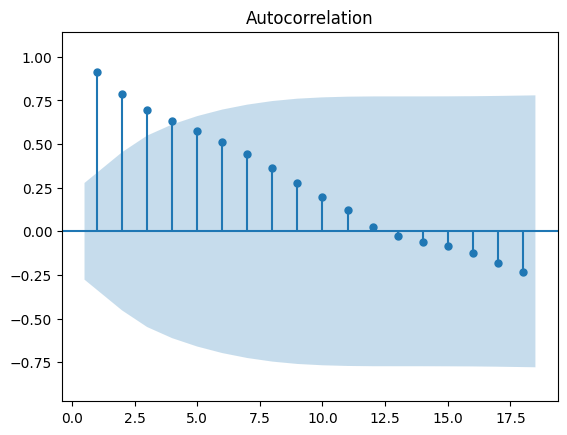

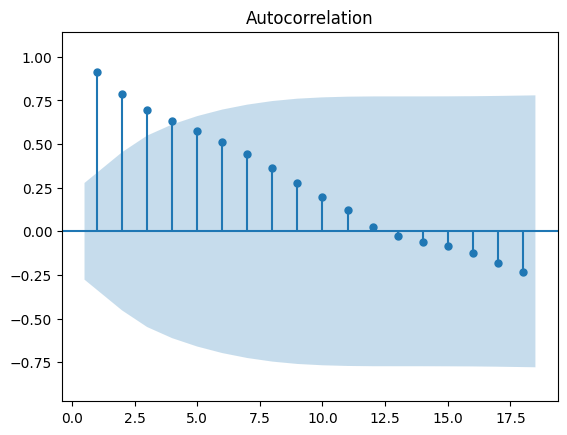

In [ ]:
#autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data["edexp_gdp"], lags=18, missing = 'drop',
zero = False, auto_ylims = True)

In [ ]:
import statsmodels.tsa.ardl as ardl
#fit the ARDL model with dependent variable being

In [ ]:
#fit the best ARDL model with dependent variable
#being proportion educational expenditures

ardlmodel = ardl.ardl_select_order(endog = data["edexp_gdp"], maxlag = 5,
exog = data[["dtr_g_gdp_cap", "dtr_durban", "dmedage", "d_LFP"]],\
                      maxorder = 6,
causal = True, missing = "drop", ic = "aic").model.fit()

print(ardlmodel.summary())

ardlmodel = ardl.ardl_select_order(endog = data["edexp_gdp"], maxlag = 5,
exog = data[["dtr_g_gdp_cap", "dtr_durban", "dtr_d_over_65", "d_LFP"]],\
                      maxorder = 6,
causal = True, missing = "drop", ic = "aic").model.fit()

print(ardlmodel.summary())

ardlmodel = ardl.ardl_select_order(endog = data["edexp_gdp"], maxlag = 5,
exog = data[["dtr_g_gdp_cap", "dtr_durban", "d_over_85", "d_LFP"]],\
                      maxorder = 6,
causal = True, missing = "drop", ic = "aic").model.fit()

print(ardlmodel.summary())

ardlmodel = ardl.ardl_select_order(endog = data["edexp_gdp"], maxlag = 5,
exog = data[["dtr_g_gdp_cap", "dmedage", "dtr_durban", "dtr_d_over_65", "d_LFP"]],\
                      maxorder = 6,
causal = True, missing = "drop", ic = "aic").model.fit()

print(ardlmodel.summary())

ardlmodel = ardl.ardl_select_order(endog = data["edexp_gdp"], maxlag = 5,
exog = data[["dtr_g_gdp_cap", "dmedage", "dtr_durban", "d_over_85", "d_LFP"]],\
                      maxorder = 6,
causal = True, missing = "drop", ic = "aic").model.fit()

print(ardlmodel.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               ARDL Model Results                              
Dep. Variable:               edexp_gdp   No. Observations:                   49
Model:             ARDL(3, 6, 1, 5, 5)   Log Likelihood                 274.774
Method:                Conditional MLE   S.D. of innovations              0.001
Date:                 Tue, 14 May 2024   AIC                           -505.547
Time:                         12:51:57   BIC                           -465.317
Sample:                              6   HQIC                          -490.477
                                    49                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0199      0.007     -2.966      0.007      -0.034      -0.006
edexp_gdp.L1         1.6522      0.270      6.110      0.000       1.095       2.209
edexp_gdp.L2        

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               ARDL Model Results                              
Dep. Variable:               edexp_gdp   No. Observations:                   49
Model:             ARDL(5, 2, 5, 6, 5)   Log Likelihood                 265.040
Method:                Conditional MLE   S.D. of innovations              0.001
Date:                 Tue, 14 May 2024   AIC                           -480.079
Time:                         12:52:00   BIC                           -435.474
Sample:                              6   HQIC                          -463.538
                                    49                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0071      0.006      1.262      0.222      -0.005       0.019
edexp_gdp.L1         1.7114      0.294      5.827      0.000       1.099       2.324
edexp_gdp.L2        

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               ARDL Model Results                              
Dep. Variable:               edexp_gdp   No. Observations:                   49
Model:             ARDL(5, 5, 6, 6, 6)   Log Likelihood                 270.747
Method:                Conditional MLE   S.D. of innovations              0.001
Date:                 Tue, 14 May 2024   AIC                           -481.494
Time:                         12:52:03   BIC                           -427.968
Sample:                              6   HQIC                          -461.644
                                    49                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0058      0.008      0.718      0.484      -0.011       0.023
edexp_gdp.L1         1.5283      0.479      3.194      0.006       0.508       2.548
edexp_gdp.L2        

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                ARDL Model Results                                
Dep. Variable:                  edexp_gdp   No. Observations:                   49
Model:             ARDL(4, 5, 6, 5, 6, 6)   Log Likelihood                 291.870
Method:                   Conditional MLE   S.D. of innovations              0.000
Date:                    Tue, 14 May 2024   AIC                           -515.741
Time:                            12:52:21   BIC                           -454.314
Sample:                                 6   HQIC                          -492.841
                                       49                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0318      0.015     -2.105      0.057      -0.065       0.001
edexp_gdp.L1         2.4154      0.350      6.905      0.000       1.653       3.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                ARDL Model Results                                
Dep. Variable:                  edexp_gdp   No. Observations:                   49
Model:             ARDL(5, 6, 6, 5, 5, 6)   Log Likelihood                 294.240
Method:                   Conditional MLE   S.D. of innovations              0.000
Date:                    Tue, 14 May 2024   AIC                           -518.480
Time:                            12:52:39   BIC                           -456.034
Sample:                                 6   HQIC                          -495.322
                                       49                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0400      0.015     -2.756      0.020      -0.072      -0.008
edexp_gdp.L1         2.3996      0.455      5.268      0.000       1.385       3.

*Instrumental variable*

In [ ]:
try:
  import linearmodels as lm
except:
  !pip install linearmodels
  import linearmodels as lm

formula = "dtr_g_gdp_cap ~ ["
for i in range (9, 12):
  data["edexp_dev_lag"+ str(i)] = data["dtr_g_edexp_cap"].shift(i)
  formula = formula + "edexp_dev_lag" + str(i) + "+"
formula = formula[:-1]
formula = formula + "~dmedage + dtr_durban+ d_over_85]"
tsls = lm.IV2SLS.from_formula(formula,
                              data = data[13:])
print(tsls.fit())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 5.6 MB/s eta 0:00:00
                          IV-2SLS Estimation Summary                          
Dep. Variable:          dtr_g_gdp_cap   R-squared:                     -75.394
Estimator:                    IV-2SLS   Adj. R-squared:                -82.134
No. Observations:                  37   F-statistic:                    0.7547
Date:                Tue, May 14 2024   P-value (F-stat)                0.8603
Time:                        12:52:49   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                                Parameter Estimates                                
                 Parameter  Std. Err.     T-st

**We will next conduct a regression on differences of panel data**

In [ ]:
data = pd.read_csv("paneldata2.csv")
for column in data.columns:
  if column == "State":
    continue
  if column == "StateID":
    data[column] = data[column].astype(int)
  else:
    data[column] = data[column].astype(float)
print(data.head())

           State  StateID      d_ed     g_gdp  d_medage  d_retired     d_lfp  \
0  United States        0 -0.019534 -0.023173      0.20     0.0039 -0.003909   
1        Alabama        1  0.005989 -0.014343      0.25     0.0040 -0.002818   
2         Alaska        2  0.044931 -0.076109      0.10     0.0054 -0.005727   
3        Arizona        3 -0.027239  0.006327      0.40     0.0045  0.000364   
4       Arkansas        4  0.019719 -0.014358      0.25     0.0034 -0.001000   

    d_urban  
0 -0.007725  
1 -0.001300  
2 -0.001100  
3 -0.000500  
4 -0.000700  


In [ ]:
data = data.iloc[1:,]
print(data.head())

        State  StateID      d_ed     g_gdp  d_medage  d_retired     d_lfp  \
1     Alabama        1  0.005989 -0.014343      0.25     0.0040 -0.002818   
2      Alaska        2  0.044931 -0.076109      0.10     0.0054 -0.005727   
3     Arizona        3 -0.027239  0.006327      0.40     0.0045  0.000364   
4    Arkansas        4  0.019719 -0.014358      0.25     0.0034 -0.001000   
5  California        5 -0.035567 -0.013065      0.15     0.0038 -0.003273   

   d_urban  
1  -0.0013  
2  -0.0011  
3  -0.0005  
4  -0.0007  
5  -0.0008  


In [ ]:
#run regression
model = ols("d_ed ~ g_gdp + d_medage + d_retired + d_lfp + d_urban + 1",\
            data = data).fit(cov_type = "HC1")
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   d_ed   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.5586
Date:                Tue, 14 May 2024   Prob (F-statistic):              0.731
Time:                        12:53:09   Log-Likelihood:                 110.24
No. Observations:                  50   AIC:                            -208.5
Df Residuals:                      44   BIC:                            -197.0
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0157      0.011     -1.474      0.1

**Try Fixed Effects** doesn't work

In [ ]:
data = pd.read_csv("fedata.csv")
for column in data.columns:
  if column == "State":
    continue
  elif column == "t":
    data[column] = data[column].astype(int)
  else:
    if type(data[column][0]) == str:
      newc = pd.Series([0]*len(data[column]))
      for item in data[column]:
        item.replace(",", "")
      data[column] = newc
    data[column] = data[column].astype(float)
print(data.head())
data_pd = data.set_index(['State','t'])

     State  t  edexp_gdp  gdp  medage  retired        lfp    urban
0  Alabama  1   0.017234  0.0   39.10   17.200  57.554546  0.57895
1  Alabama  2   0.016907  0.0   39.35   17.600  57.272727  0.57765
2   Alaska  1   0.014999  0.0   36.20   12.290  64.563636  0.65065
3   Alaska  2   0.014842  0.0   36.30   12.830  63.990909  0.64955
4  Arizona  1   0.013296  0.0   39.15   17.825  61.654545  0.89375


In [ ]:
##try:
##  import linearmodels as lm
##except:
##  !pip install linearmodels
##  import linearmodels as lm

##model = lm.PanelOLS.from_formula("edexp_gdp ~ gdp + medage + retired +" +\
##                                 "lfp + urban + 1 + EntityEffects",\
##                                 data = data_pd)
##fatality_fe = model.fit(cov_type='clustered', cluster_entity=True)
##print(fatality_fe)
